In [1]:
import numpy as np
import pandas as pd
import os

from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

from scipy.special import rel_entr
from scipy.stats import entropy
import scipy.stats
import math
import warnings 
warnings.filterwarnings("ignore") 

# 資料表公司合併 CN

In [2]:
for i in range(2015,2020):
    us = pd.read_csv("competitor_df/company/cpc_cn_{}.csv".format(i))
    us_a = pd.read_csv("competitor_df/company/cpc_cn_{}.csv".format(i+1))
    
    us.rename(columns = {'cpc':'cpc_{}'.format(i), 'country':'country_{}'.format(i)}, inplace = True)
    us_a.rename(columns = {'cpc':'cpc_{}'.format(i+1), 'country':'country_{}'.format(i+1)}, inplace = True)
    
    if i != 2015:
        us_all = pd.merge(us_all,us_a, on=['company'],how='outer')
    else:
        us_all = pd.merge(us,us_a, on=['company'],how='outer')
    
    
    

In [3]:
us_all

,company,cpc_2015,country_2015,cpc_2016,country_2016,cpc_2017,country_2017,cpc_2018,country_2018,cpc_2019,country_2019,cpc_2020,country_2020
0,Qinchuan_IoT,0.589195,0.610376,0.135692,0.430381,0.329000,0.347441,NaN,NaN,NaN,NaN,NaN,NaN
1,SUZHOU_XUANHE_IOT,0.240967,0.616430,0.170219,0.488445,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Jiangsu_IoT,0.420315,0.543976,0.115815,0.482918,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Hansense_IOT,0.130694,0.413306,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Nanjing_IoT,0.270279,0.410445,0.236255,0.489685,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,ABEJ_IOT,0.010702,0.407761,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Huawei Technologies,0.619599,0.265119,0.876298,0.379693,0.585026,0.220966,0.678736,0.223773,0.669662,0.436963,1.667583,1.539802
7,QIANHAI_LINGJU,0.000766,0.364882,0.114274,0.334900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Livall,0.000766,0.364882,0.114274,0.334900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,THZST,0.006636,0.398469,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
cpc_ls = list(-us_all[us_all.company=="Huawei Technologies"].iloc[:,[1,3,5,7,9,11]].values[0])
country_ls = list(-us_all[us_all.company=="Huawei Technologies"].iloc[:,[2,4,6,8,10,12]].values[0])
year = list(range(2015,2021))

In [5]:
df = pd.DataFrame((zip(year, cpc_ls, country_ls)), columns = ['year','cpc', 'country'])

In [6]:
df

,year,cpc,country
0,2015,-0.619599,-0.265119
1,2016,-0.876298,-0.379693
2,2017,-0.585026,-0.220966
3,2018,-0.678736,-0.223773
4,2019,-0.669662,-0.436963
5,2020,-1.667583,-1.539802


# Scatter plot

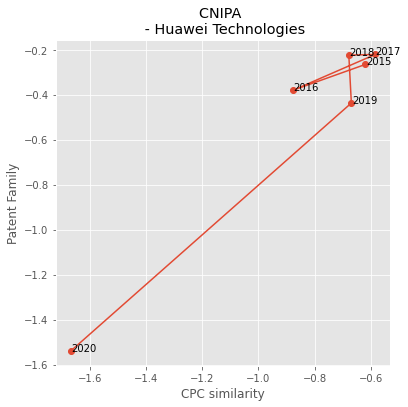

In [10]:
plt.figure(figsize=(6,6))
plt.style.use('ggplot')

plt.plot("cpc", "country", data=df, linestyle='-', marker='o')
# plt.scatter(-c_df.cpc, -c_df.country, alpha=0.5)


plt.title("CNIPA \n - Huawei Technologies")
plt.xlabel("CPC similarity")
plt.ylabel("Patent Family")


for i, txt in enumerate(df.year):
    plt.text(df.cpc[i]+0.0015, df.country[i],txt)



plt.show()